In [24]:
import qiskit

# classical gates

## OR gate

*(how is this gate built in a classical computer?)*

two connecting wires

In [56]:
# inputs | output
#  0 | 0 |   0
#  0 | 1 |   1
#  1 | 0 |   1
#  1 | 1 |   1


def or_gate(x, y):
    return x or y

print(or_gate(0,0))
print(or_gate(0,1))
print(or_gate(1,0))
print(or_gate(1,1))

0
1
1
1


## AND gate

*(how is this gate built in a classical computer?)*

https://en.wikipedia.org/wiki/Transistor

In [27]:
# inputs | output
#  0 | 0 |   0
#  0 | 1 |   0
#  1 | 0 |   0
#  1 | 1 |   1


def and_gate(x, y):
    return x and y

print(and_gate(0,0))
print(and_gate(0,1))
print(and_gate(1,0))
print(and_gate(1,1))

0
0
0
1


## NOT gate

*(how is this gate built in a classical computer?)

https://en.wikipedia.org/wiki/Inverter_(logic_gate)

In [59]:
# input | output
#  0    |   1
#  1    |   0


def not_gate(x):
    return not x

print(not_gate(0))
print(not_gate(1))

True
False


## XOR gate

*(how is this gate built in a classical computer?)*

combination of AND, NOT, and OR

In [60]:
# inputs | output
#  0 | 0 |   0
#  0 | 1 |   1
#  1 | 0 |   1
#  1 | 1 |   0


def xor_gate(x, y):
    return (x or y) and not (x and y)

print(xor_gate(0,0))
print(xor_gate(0,1))
print(xor_gate(1,0))
print(xor_gate(1,1))

0
True
True
False


## x gate (classical: NOT)
Features of the NOT gate:
* 0 --> 1
* 1 --> 0

In [72]:
qc_x = qiskit.QuantumCircuit(1) # one qbit quantum circuit
qc_x.x(0) # x gate on the qbit
qc_x.measure_all() # add a measurement gate to the register
qc_x.draw() # draw the circuit

┌───┐ ░ ┌─┐
     q: ┤ X ├─░─┤M├
        └───┘ ░ └╥┘
meas: 1/═════════╩═
                 0

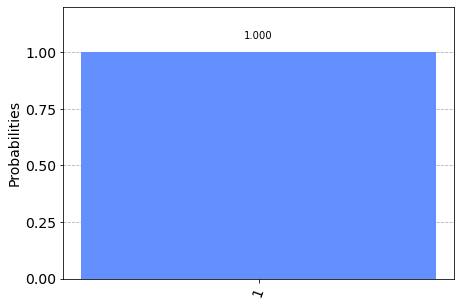

In [73]:
def visualize(quantum_circuit):
    # run the quantum circuit on the simulator
    sim = qiskit.Aer.get_backend('aer_simulator')
    result = sim.run(quantum_circuit).result()
    counts = result.get_counts()

    # visualize the results
    return qiskit.visualization.plot_histogram(counts) # plot them using a histogram

visualize(qc_x)

## cnot gate (classical: XOR)

https://en.wikipedia.org/wiki/Controlled_NOT_gate

In [68]:
qc_cx = qiskit.QuantumCircuit(2)  # Create a quantum circuit with two qubits
initial_state_0 = [1,0] # initial state is |0>
initial_state_1 = [0,1] # initial state is |1>
qc_cx.initialize(initial_state_0, 0) # apply |0> to the first qubit
qc_cx.initialize(initial_state_1, 1) # apply |1> to the second qubit
qc_cx.cx(0, 1) # add a cnot gate controlled by qubit 0, targeting qubit 1
qc_cx.save_statevector()
qc_cx.measure_all()
qc_cx.draw()  # draw the circuit

┌─────────────────┐      ░  ░ ┌─┐   
   q_0: ┤ Initialize(1,0) ├──■───░──░─┤M├───
        ├─────────────────┤┌─┴─┐ ░  ░ └╥┘┌─┐
   q_1: ┤ Initialize(0,1) ├┤ X ├─░──░──╫─┤M├
        └─────────────────┘└───┘ ░  ░  ║ └╥┘
meas: 2/═══════════════════════════════╩══╩═
                                       0  1

In [66]:
sim = qiskit.Aer.get_backend('aer_simulator')  # use the classical Aer simulator
qobj_cx = qiskit.assemble(qc_cx) # assemble the quantum circuit for processing
result = sim.run(qc_cx).result()
print(result.get_counts())

{'01': 1024}


## Toffoli gate (classical: AND)

https://en.wikipedia.org/wiki/Toffoli_gate

In [70]:
qc_ccx = qiskit.QuantumCircuit(3)  # Create a quantum circuit with three qubits
initial_state_0 = [0,1] # initial state is |1>
initial_state_1 = [0,1] # initial state is |1>
initial_state_2 = [1,0] # initial state is |0>
qc_ccx.initialize(initial_state_0, 0) # apply |1> to the first qubit
qc_ccx.initialize(initial_state_1, 1) # apply |1> to the second qubit
qc_ccx.initialize(initial_state_2, 2) # apply |0> to the third qubit
qc_ccx.ccx(0, 1, 2) # add a ccnot gate controlled by qubits 0 and 1, targeting qubit 2
qc_ccx.save_statevector()
qc_ccx.measure_all()
qc_ccx.draw()  # draw the circuit

┌─────────────────┐      ░  ░ ┌─┐      
   q_0: ┤ Initialize(0,1) ├──■───░──░─┤M├──────
        ├─────────────────┤  │   ░  ░ └╥┘┌─┐   
   q_1: ┤ Initialize(0,1) ├──■───░──░──╫─┤M├───
        ├─────────────────┤┌─┴─┐ ░  ░  ║ └╥┘┌─┐
   q_2: ┤ Initialize(1,0) ├┤ X ├─░──░──╫──╫─┤M├
        └─────────────────┘└───┘ ░  ░  ║  ║ └╥┘
meas: 3/═══════════════════════════════╩══╩══╩═
                                       0  1  2

In [71]:
sim = qiskit.Aer.get_backend('aer_simulator')  # use the classical Aer simulator
qobj_ccx = qiskit.assemble(qc_ccx) # assemble the quantum circuit for processing
result = sim.run(qc_ccx).result()
print(result.get_counts())

{'111': 1024}


# Hadamard Gate (no classical analog)

https://en.wikipedia.org/wiki/Hadamard_transform

In [75]:
qc_h = qiskit.QuantumCircuit(1)  # Create a quantum circuit with one qubit
qc_h.h(0) # add a Hadamard (H) gate to the qubit
qc_h.measure_all()
qc_h.draw()  # draw the circuit

┌───┐ ░ ┌─┐
     q: ┤ H ├─░─┤M├
        └───┘ ░ └╥┘
meas: 1/═════════╩═
                 0

In [76]:
sim = qiskit.Aer.get_backend('aer_simulator')  # use the classical Aer simulator
qobj_h = qiskit.assemble(qc_h) # assemble the quantum circuit for processing
result = sim.run(qc_h).result()
print(result.get_counts())

{'0': 530, '1': 494}


coin toss! (this is a complex problem in classical computing...)